# Dataset Evaluation
Author: Shiyi Wang

In [1]:
import pandas as pd
import numpy as np

In [16]:
interactions = pd.read_csv('../data/interactions.csv')
recipes = pd.read_csv('../data/recipes.csv')

In [17]:
interactions.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [6]:
recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [8]:
interactions = pd.read_csv('../data/interactions.csv', usecols=['user_id','recipe_id','rating'])
recipes = pd.read_csv('../data/recipes.csv', usecols=['name','id'])
recipes = recipes.rename(columns={"id": "recipe_id"})
data = interactions.join(recipes.set_index('recipe_id'), on='recipe_id')

In [9]:
data

,user_id,recipe_id,rating,name
0,38094,40893,4,white bean green chile pepper soup
1,1293707,40893,5,white bean green chile pepper soup
2,8937,44394,4,devilicious cookie cake delights
3,126440,85009,5,baked potato toppings
4,57222,85009,5,baked potato toppings
...,...,...,...,...
1132362,116593,72730,0,cranberry peach maple relish
1132363,583662,386618,5,stacey e s yummy veggie burgers
1132364,157126,78003,5,pot roast with port stove top
1132365,53932,78003,4,pot roast with port stove top


In [10]:
data.groupby('name')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
name,,,,,,,,
0 carb 0 cal gummy worms,5.0,3.800000,2.167948,0.0,4.0,5.0,5.0,5.0
0 fat chunky watermelon salsa,1.0,5.000000,NaN,5.0,5.0,5.0,5.0,5.0
0 point ice cream only 1 ingredient,1.0,5.000000,NaN,5.0,5.0,5.0,5.0,5.0
0 point soup ww,9.0,4.777778,0.440959,4.0,5.0,5.0,5.0,5.0
0 point soup crock pot,5.0,5.000000,0.000000,5.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...
zydeco sauce,2.0,5.000000,0.000000,5.0,5.0,5.0,5.0,5.0
zydeco shrimp wrap,1.0,3.000000,NaN,3.0,3.0,3.0,3.0,3.0
zydeco soup,6.0,5.000000,0.000000,5.0,5.0,5.0,5.0,5.0


In [12]:
ratings_mean = data.groupby('name')['rating'].describe()['mean']
ratings_count = data.groupby('name')['rating'].describe()['count']
ratings_mean_count_merged = pd.concat([ratings_count, ratings_mean], axis = 1)
ratings_mean_count_merged.reset_index()

,name,count,mean
0,0 carb 0 cal gummy worms,5.0,3.800000
1,0 fat chunky watermelon salsa,1.0,5.000000
2,0 point ice cream only 1 ingredient,1.0,5.000000
3,0 point soup ww,9.0,4.777778
4,0 point soup crock pot,5.0,5.000000
...,...,...,...
230180,zydeco sauce,2.0,5.000000
230181,zydeco shrimp wrap,1.0,3.000000
230182,zydeco soup,6.0,5.000000
230183,zydeco spice mix,1.0,5.000000


<AxesSubplot:ylabel='Frequency'>

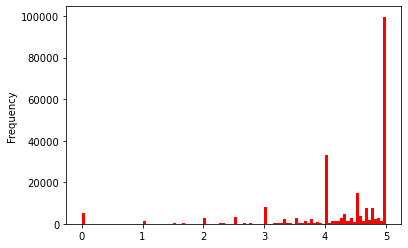

In [13]:
ratings_mean_count_merged['mean'].plot(bins=100, kind='hist', color = 'r') 

<AxesSubplot:ylabel='Frequency'>

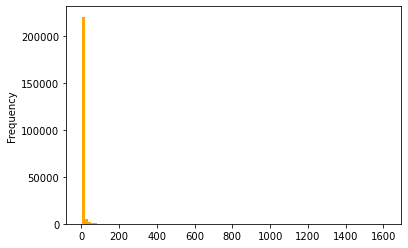

In [14]:
ratings_mean_count_merged['count'].plot(bins=100, kind='hist', color = 'orange')

In [15]:
ratings_mean_count_merged.sort_values('count', ascending = False).head(100)

,count,mean
name,,
best banana bread,1614.0,4.186493
to die for crock pot roast,1601.0,4.288570
crock pot chicken with black beans cream cheese,1579.0,4.220393
creamy cajun chicken pasta,1448.0,4.541436
best ever banana cake with cream cheese frosting,1322.0,4.329047
...,...,...
southern fried chicken,323.0,4.318885
crock pot chicken gravy and stuffing,322.0,4.397516
4 minute spicy garlic shrimp,321.0,4.623053
